In [1]:
# Description: Plot Figure S2 (Different surface jet profiles in the 2.5-layer geostrophic adjustment model).
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        May/2023

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sol_twohalflay_outcrop(x, H1r, H2r, H2l, gp1, gp2, f):
    L1r = np.sqrt(gp1*H1r)/f
    L2r = np.sqrt(gp2*H2r)/f
    L2l = np.sqrt(gp2*H2l)/f
    DH2 = H2r - H2l
    Gp = 1 + gp2/gp1

    sqrt2 = np.sqrt(2)
    Llrsq = 4*(L1r/L2r)**2
    a1m = np.sqrt((Gp - np.sqrt(Gp + Llrsq)))/sqrt2
    a1p = np.sqrt((Gp + np.sqrt(Gp + Llrsq)))/sqrt2
    a2m = np.sqrt((Gp - np.sqrt(Gp - Llrsq)))/sqrt2
    a2p = np.sqrt((Gp + np.sqrt(Gp - Llrsq)))/sqrt2

    A1r = + H1r*a1m/(a1p - a1m)
    B1r = - H1r*a1p/(a1p - a1m)
    A2rnum = DH2*a2p * (L1r*a2m*(a1p + a1m) + a1p*a1m*(L2l*a2m - L2r))
    A2rden = a1p*a1m * (L2l*a2p**2 - L2l*a2p*a2m + L2r*a2p - L2r*a2m)
    A2r = A2rnum/A2rden
    B2rnum = DH2*a2m * (-L1r*a2p*(a1p + a1m) - a1p*a1m*(L2l*a2p - L2r))
    B2rden = a1p*a1m * (L2l*a2p*a2m - L2l*a2m**2 + L2r*a2p - L2r*a2m)
    B2r = B2rnum/B2rden
    A2lnum = DH2*L2l * (-L1r*a2p*a2m*(a1p + a1m) + L2r*a1p*a1m*(a2p + a2m))
    A2lden = a1p*a1m * (a2p*a2m*L2l**2 + L2l*L2r*(a2m + a2p) + L2r**2)
    A2l = A2lnum/A2lden
    d = (A1r/a1p + B1r/a1m)*L1r/H1r
    xp = x - d

    # Solutions for h1r(x), v1r(x), h2r(x), v2r(x), h2l(x), v2l(x).
    h2l = A2l*np.exp(xp/L2l) + H2l
    h2r = A2r*np.exp(-a2p*xp/L2r) + B2r*np.exp(-a2m*xp/L2r) + H2r
    h1r = A1r*np.exp(-a1p*xp/L1r) + B1r*np.exp(-a1m*xp/L1r) + H1r

    v2l = (A2l/L2l)*(gp2/f)*np.exp(xp/L2l)
    T1v = (A1r*a1p*np.exp(-a1p*xp/L1r) + B1r*a1m*np.exp(-a1m*xp/L1r))/L1r
    T2v = (A2r*a2p*np.exp(-a2p*xp/L2r) + B2r*a2m*np.exp(-a2m*xp/L2r))/L2r
    v2r = - (gp2/f)*(T1v + T2v)
    v1r = v2r - (gp1/f)*T1v

    fl, fr = xp <= 0, xp > 0
    h2l[fr] = np.nan
    h1r[fl] = np.nan
    h2r[fl] = np.nan
    v1r[fl] = np.nan
    v2r[fl] = np.nan
    v2l[fr] = np.nan

    return h1r, h2r, v1r, v2r, h2l, v2l, d, L1r, L2r, L2l

### Plot three different surface velocity profiles from the 2.5-layer model with outcropping, to illustrate sharpening of the surface jet as the outcropping layer gets thinner.

In [4]:
H2r, H2l = 800, 200
H1ra, H1rb, H1rc = H2l, 100, 50 # [m]

g = 9.81 # [m/s2
f = 9e-5    # [1/s]
rho1, rho2, rho3 = 1024, 1025, 1026
rho1, rho2, rho3 = 1024, 1024.5, 1025
gp1 = g*(rho2 - rho1)/rho2
gp2 = g*(rho3 - rho2)/rho3

Lx = 300e3  # [m]
xl, xr = -Lx/2, Lx/2
x = np.linspace(xl, xr, num=10000)
xkm, xlkm, xrkm = x*1e-3, xl*1e-3, xr*1e-3

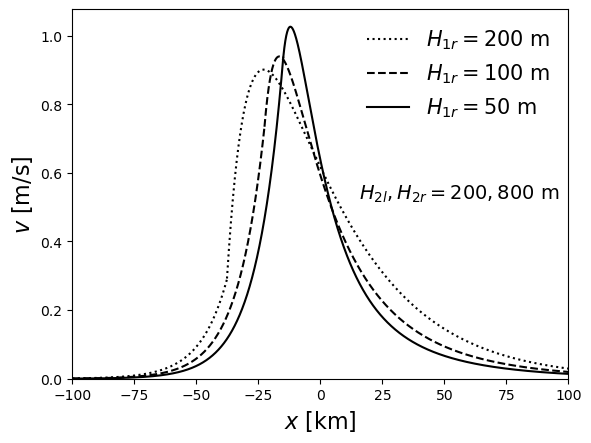

In [5]:
fig, ax = plt.subplots()

h1r, h2r, v1r, v2r, h2l, v2l, d, L1r, L2r, L2l = sol_twohalflay_outcrop(x, H1ra, H2r, H2l, gp1, gp2, f)
ax.plot(xkm, v1r, "k:", label="$H_{1r} = %d$ m"%H1ra)
ax.plot(xkm, v2l, "k:")

h1r, h2r, v1r, v2r, h2l, v2l, d, L1r, L2r, L2l = sol_twohalflay_outcrop(x, H1rb, H2r, H2l, gp1, gp2, f)
ax.plot(xkm, v1r, "k--", label="$H_{1r} = %d$ m"%H1rb)
ax.plot(xkm, v2l, "k--")

h1r, h2r, v1r, v2r, h2l, v2l, d, L1r, L2r, L2l = sol_twohalflay_outcrop(x, H1rc, H2r, H2l, gp1, gp2, f)
ax.plot(xkm, v1r, "k", label="$H_{1r} = %d$ m"%H1rc)
ax.plot(xkm, v2l, "k")

ax.set_xlim(-100, 100)
ax.set_ylim(bottom=0)
ax.legend(fontsize=15, frameon=False)
ax.set_xlabel("$x$ [km]", fontsize=16)
ax.set_ylabel("$v$ [m/s]", fontsize=16)
xt, yt = 0.78, 0.5
ax.text(xt, yt, "$H_{2l}, H_{2r} = %d, %d$ m"%(H2l, H2r), fontsize=14, ha="center", va="center", transform=ax.transAxes);

In [6]:
fig.savefig("figS2.png", bbox_inches="tight", dpi=150)